# MTH9879 Homework 1

Assigned: January 31, 2017.
Due: February 14, 2017 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

#### R version: 'R version 3.3.1 (2016-06-21)' (windows)

### 1. (4 points) 

Read Chapter 1 of Market Liquidity by Foucault, Pagano and R&ouml;ell.
What algorithmic trading strategy was being used by the seller who triggered the Flash
Crash of May 6, 2010? Why did it cause a crash? How could this algorithm have been
amended so as to avoid the ensuing disaster?

#### <font color=blue> Solution  </font>

- trading strategy used by the seller: "constant participation rate" strategy of splitting the order in such a way that each "child" order represents a fixed fraction of the total trading volume over a given period of time.

- the reason why it cause a crash: when the "parent" is relatively large, the sub-orders themselves can give a false impression of large volume, accelerating the main order's execution.

- how to amend it: the trader should make his strategy contingent on the execution price received, trading less as the price impact increases.

## The Smith Farmer zero-intelligence model

### Set up R-environment

The following code sources *ziSetup.R* which contains all the functions required for the problem.

In [5]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

source("ziSetup.R")

### 2. (4 points)

Using the provided functions in *ziSetup.R* (with $\alpha = 1$, $\mu = 10$, $\delta = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

#### <font color=blue> Solution  </font>

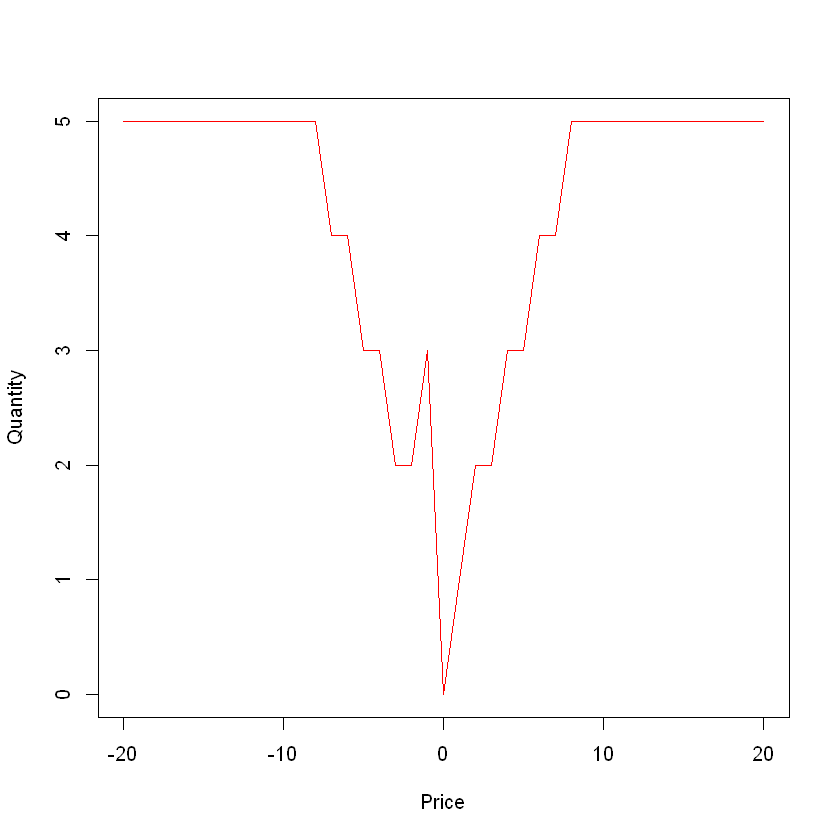

In [6]:
# turn off the logging
logging <- F

# set the parameters
alpha <-1
mu<-10
delta <- 0.2; 

# initialize the book
initializeBook5()

# add two orders so that the resulting book have 3 orders at best bid and 1 order at best offer
limitBuyOrder(-1)
limitBuyOrder(-1)

# plot the book
bookPlot(20) 

### 3. (16 points)

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|$\alpha$|$\mu$|$\delta$|
-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

(Warning: This might take longer than 15 minutes to run!).

(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).


(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

#### <font color=blue> Solution for (a) and (b) </font>

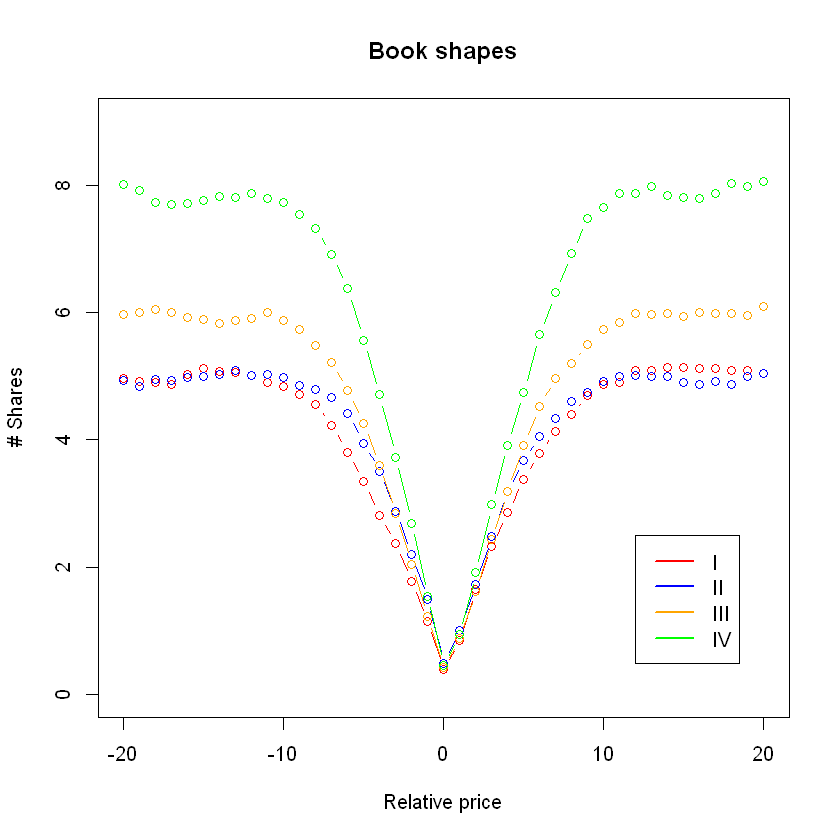

In [8]:
# turn off the logging
logging <- F

# set the parameters
alphas <- c(1,1,1,1)
mus <- c(10,8,10,10)
deltas <- c(1/5,1/5,1/6,1/8)

# initialize the book
initializeBook5()

# store the result
avgBookShapes=array(0,c(4,41))

for(i in 1:4){
  alpha <- alphas[i]
  mu <- mus[i]
  delta <- deltas[i] 
  initializeBook5()
    
  # Burn in for 1000 events
  for(count in 1:1000){
    generateEvent()
  }
    
  numEvents <- 100000 # Average over 100,000 events
  avgBookShapeTmp <- bookShape(20)/numEvents
  for(count in 2:numEvents){
    generateEvent()
    avgBookShapeTmp <- avgBookShapeTmp+bookShape(20)/numEvents
  }
  avgBookShapes[i,] <- avgBookShapeTmp
}

# plot
colors=c("red","blue","orange","green")
plot(-20:20,avgBookShapes[1,],main="Book shapes",xlab="Relative price",ylab="# Shares", col=colors[1], type="b",xlim=c(-20,20),ylim=c(0,9))
for(jj in 2:4){ 
  par(new=T)
  plot(-20:20,avgBookShapes[jj,],main=NA,xlab="",ylab="", col=colors[jj], type="b",axes=F,xlim=c(-20,20),ylim=c(0,9))
}
legend(12,2.5,c("I","II","III","IV"),lty=1, lwd = 2, col=colors)  
par(new=F)


#### <font color=blue> Solution for (c) </font>
Compare the slopes from simulation and dimensional analysis. 

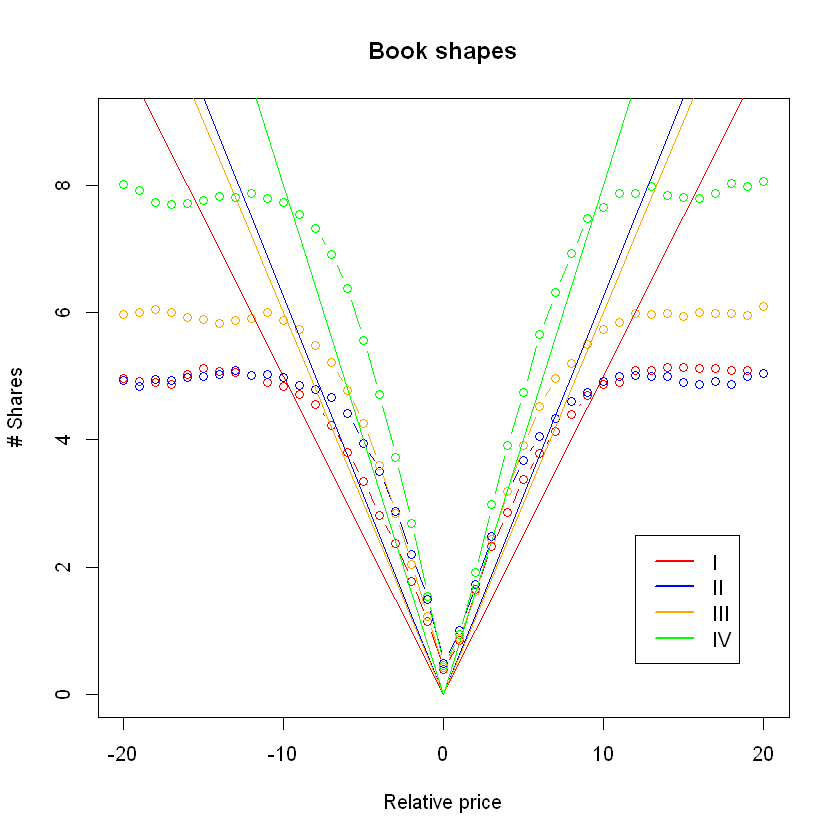

In [9]:
colors=c("red","blue","orange","green")
plot(-20:20,avgBookShapes[1,],main="Book shapes",xlab="Relative price",ylab="# Shares", col=colors[1], type="b",xlim=c(-20,20),ylim=c(0,9))
for(jj in 2:4){ 
  par(new=T)
  plot(-20:20,avgBookShapes[jj,],main=NA,xlab="",ylab="", col=colors[jj], type="b",axes=F,xlim=c(-20,20),ylim=c(0,9))
}
legend(12,2.5,c("I","II","III","IV"),lty=1, lwd = 2, col=colors)  

# compare the slope 
for (kk in 1:4){
  par(new = T)
  slopes <- alphas[kk]*alphas[kk]/mus[kk]/deltas[kk]
  FirstSlope <- c((-slopes*(-20:0)),(slopes*(1:20)))
  plot(-20:20,FirstSlope,main=NA,xlab="",ylab="", col = colors[kk], type="l",axes=F,xlim=c(-20,20),ylim=c(0,9))
}
par(new=F)

#### <font color=blue> Solution for (d) </font>
Compare the asymptotic book depths from simulation and dimensional analysis. 

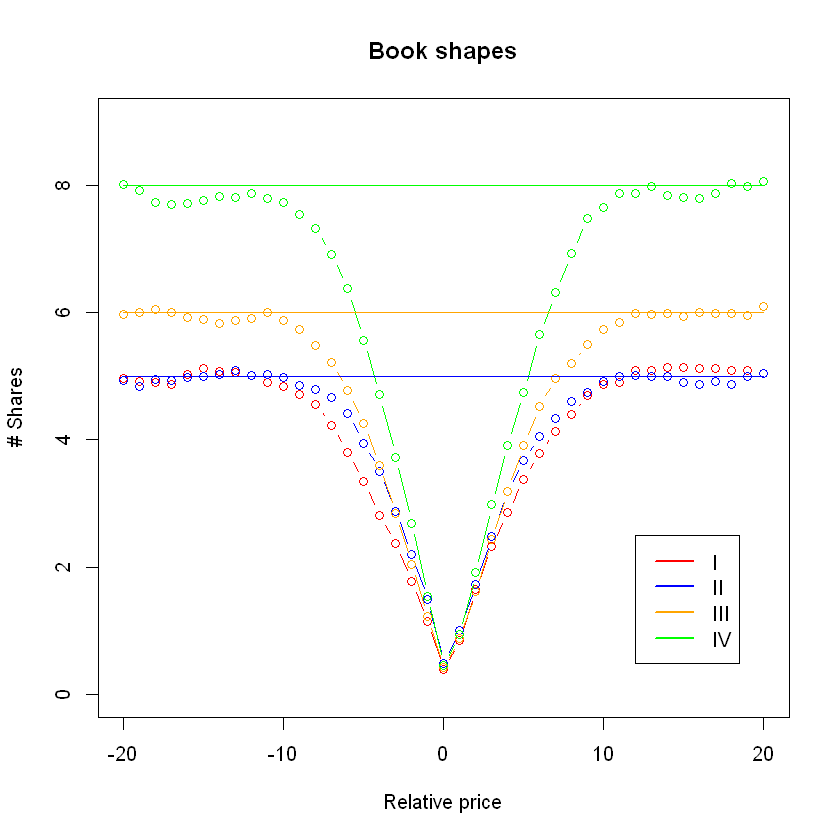

In [11]:
colors=c("red","blue","orange","green")
plot(-20:20,avgBookShapes[1,],main="Book shapes",xlab="Relative price",ylab="# Shares", col=colors[1], type="b",xlim=c(-20,20),ylim=c(0,9))
for(jj in 2:4){ 
  par(new=T)
  plot(-20:20,avgBookShapes[jj,],main=NA,xlab="",ylab="", col=colors[jj], type="b",axes=F,xlim=c(-20,20),ylim=c(0,9))
}
legend(12,2.5,c("I","II","III","IV"),lty=1, lwd = 2, col=colors)  

# compare the asymptotic book depths 
for (kk in 1:4){
  par(new = T)
  bookDepth <- rep(alphas[kk]/deltas[kk],41)
  plot(-20:20,bookDepth,main=NA,xlab="",ylab="", col = colors[kk], type="l",axes=F,xlim=c(-20,20),ylim=c(0,9))
}
par(new=F)

### The following code sets up the data required for Problem 4.

In [12]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

### 4. (12 points)

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the SFGK model with $\alpha = 1$, $\mu = 10$, and $\delta = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

(a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.


(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

#### <font color=blue> Solution for (a) </font>
Accroding to the following formulas:
$ \bar x = \frac{\sum x_i}{N} $     ;        $ \sigma_M = \frac{\sigma }{\sqrt{N}}$

In [15]:
# mean, error
meanPx <- numeric()
errPx <- numeric()
for (j in 1:10){
  tmp <- ziSimResults[[j]]
  mid <- (tmp$a+tmp$b)/2
  meanPx[j] <- mean(mid)
  errPx[j] <- sd(mid)/sqrt(length(mid))
}

data.frame(meanPx,errPx)

meanPx,errPx
0.00590,0.015379863
0.21550,0.014316301
0.41350,0.013108355
0.56635,0.012291150
0.66850,0.011233583
0.74110,0.010380166
0.80530,0.010190907
0.80955,0.009888385
0.83880,0.009779878
0.83435,0.009617315


#### <font color=blue> Solution for (b) </font>

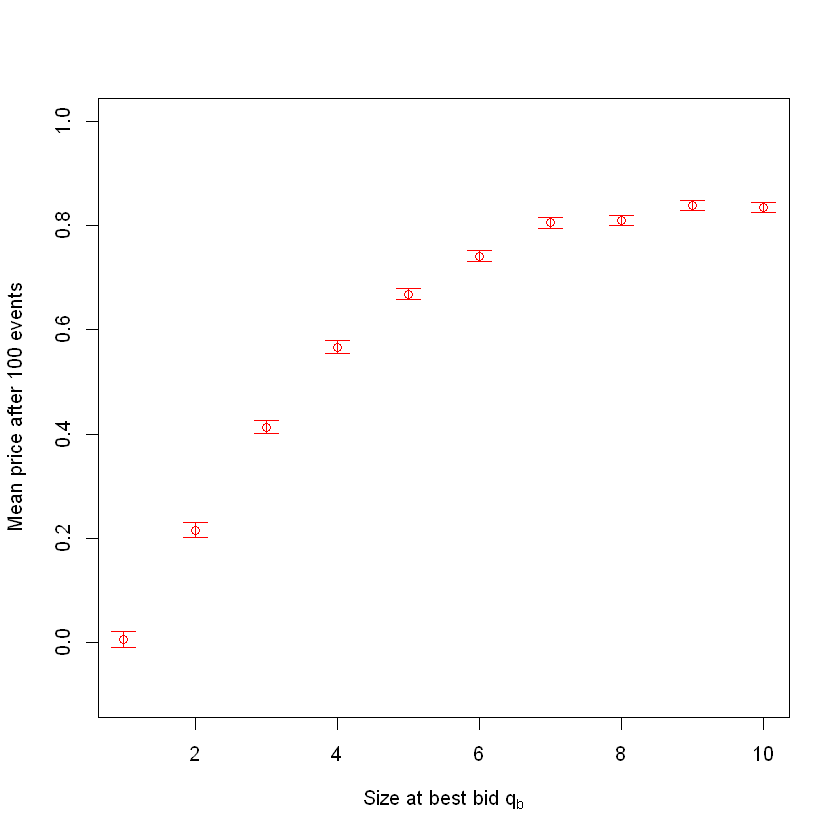

In [16]:
plot(c(1:10),meanPx,ylim=c(-.1,1),col="red",xlab=expression(paste("Size at best bid ",q[b])),ylab="Mean price after 100 events")
arrows(c(1:10),meanPx+errPx,c(1:10),meanPx-errPx,angle=90,code=3,length=.1,col="red")

#### <font color=blue> Solution for (c) </font>
First we calculate the order book imbalance:
$
I = \frac{ q_b-q_a}{q_b+q_a}.
$

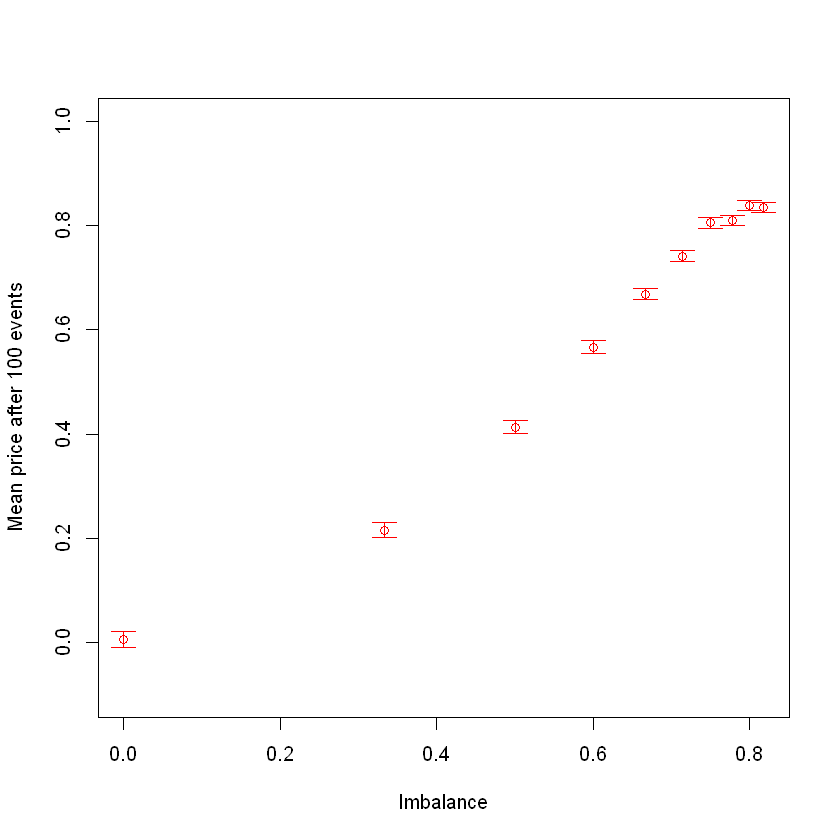

In [19]:
qb <- c(1:10)
qa <- rep(1,10)
I <- (qb-qa)/(qb+qa)
plot(I,meanPx,ylim=c(-.1,1),col="red",xlab="Imbalance",ylab="Mean price after 100 events")
arrows(I,meanPx+errPx,I,meanPx-errPx,angle=90,code=3,length=.1,col="red")

#### <font color=blue> Solution for (d) </font>
If there is more on the bid than the ask side of the order book, the price is expected
to increase.

## Is the market price a martingale?

### 5. (4 points) 

A derivatives quant explains (patiently) to you that asset prices are martingales (informally speaking that expected price changes are zero). Do you agree? How is your understanding consistent with the derivative quant’s understanding?

#### <font color=blue> Solution </font>

I don't agree and the reasons are as follow:

- Microstructure models show that if you condition on the state of the book or the history of order flow, you can predict future prices.

- According to Fundamental Theorem of Asset Pricing, the market should be a martingale if and only if the market is arbitrage-free. 
